In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import layers

In [3]:
!wget https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py

--2025-10-06 04:31:21--  https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6733 (6.6K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   6.58K  --.-KB/s    in 0s      

2025-10-06 04:31:21 (88.6 MB/s) - ‘helper_functions.py’ saved [6733/6733]



In [4]:
from helper_functions import *

In [5]:
import tensorflow_datasets as tfds

In [6]:
datasets=tfds.list_builders()

In [8]:
len(datasets)

1314

In [13]:
(train_data,test_data),ds_info=tfds.load('cifar100',shuffle_files=True,as_supervised=True,with_info=True,split=['train','test'])

In [14]:
ds_info.features

FeaturesDict({
    'coarse_label': ClassLabel(shape=(), dtype=int64, num_classes=20),
    'id': Text(shape=(), dtype=string),
    'image': Image(shape=(32, 32, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=100),
})

In [17]:
class_names=ds_info.features['label'].names

In [18]:
class_names[:10]

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle']

In [32]:
train_one_sample=train_data.take(1)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [33]:
for image, label in train_one_sample:
  print(f'''
  Image Shape: {image.shape},
  Image Dtype: {image.dtype},
  Target class from cifar100 : {label},
  Classname (str form) : {class_names[label.numpy()]}
  ''')


  Image Shape: (32, 32, 3),
  Image Dtype: <dtype: 'uint8'>,
  Target class from cifar100 : 66,
  Classname (str form) : raccoon
  


In [21]:
image

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[151, 154, 145],
        [144, 147, 135],
        [141, 143, 134],
        ...,
        [ 44,  38,  39],
        [112, 100,  96],
        [145, 127, 120]],

       [[153, 156, 150],
        [141, 144, 135],
        [139, 142, 136],
        ...,
        [ 68,  59,  59],
        [131, 113, 106],
        [121, 101,  94]],

       [[163, 165, 161],
        [150, 153, 145],
        [147, 149, 144],
        ...,
        [ 75,  66,  60],
        [101,  86,  77],
        [ 83,  77,  73]],

       ...,

       [[150, 150, 162],
        [ 51,  52,  67],
        [ 46,  42,  56],
        ...,
        [ 60,  59,  48],
        [ 71,  73,  56],
        [ 58,  62,  44]],

       [[146, 158, 168],
        [ 92, 106, 116],
        [ 73,  77,  85],
        ...,
        [ 54,  55,  40],
        [ 59,  66,  41],
        [ 52,  56,  28]],

       [[ 92,  95, 105],
        [ 86,  90, 100],
        [ 77,  74,  82],
        ...,
        [ 59,  61,  44]

In [22]:
import tensorflow as tf
tf.reduce_min(image),tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=1>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=241>)

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

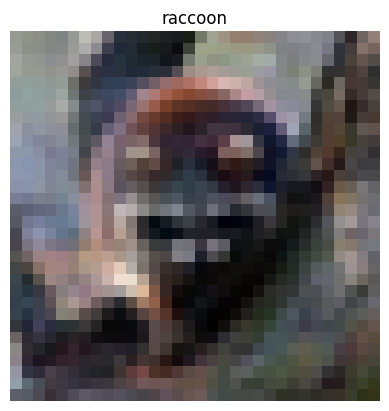

In [34]:
# Plot image now
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

In [35]:
# Creating a preprocessing function now
def preprocess_img(image,label,img_shape=32):
    image=tf.image.resize(image,[img_shape,img_shape])
    return tf.cast(image,tf.float32),label

In [36]:
preprocessed_image=preprocess_img(image=image,label=label,img_shape=32)[0]
print(f'image before preprocessing {image[:2]}....\n  , Image Shape : {image.shape} \n Data Type : {image.dtype}')
print(f'image after preprocessing {preprocessed_image[:2]}....\n  , Image Shape : {preprocessed_image.shape} \n Data Type : {preprocessed_image.dtype}')

image before preprocessing [[[151 154 145]
  [144 147 135]
  [141 143 134]
  [131 135 130]
  [126 132 129]
  [149 153 146]
  [189 189 182]
  [170 165 163]
  [102  99 106]
  [ 41  48  61]
  [ 39  45  53]
  [ 36  41  43]
  [ 36  39  35]
  [ 29  31  32]
  [ 25  27  28]
  [ 26  29  20]
  [117 122 104]
  [160 163 146]
  [158 146 132]
  [147 126 111]
  [146 126 112]
  [145 131 121]
  [136 129 126]
  [133 133 135]
  [142 143 148]
  [144 144 151]
  [136 136 145]
  [130 130 139]
  [ 83  83  88]
  [ 44  38  39]
  [112 100  96]
  [145 127 120]]

 [[153 156 150]
  [141 144 135]
  [139 142 136]
  [133 135 134]
  [134 135 135]
  [155 156 153]
  [172 173 171]
  [141 138 145]
  [ 62  63  78]
  [ 32  41  57]
  [ 35  43  53]
  [ 24  31  34]
  [ 23  29  24]
  [ 23  25  28]
  [ 12  12  15]
  [ 63  66  54]
  [157 163 138]
  [157 163 136]
  [154 159 134]
  [154 154 130]
  [156 153 130]
  [153 153 136]
  [142 147 137]
  [127 129 132]
  [128 128 134]
  [132 132 140]
  [138 138 149]
  [118 120 132]
  [ 48  51 

In [38]:
train_data=train_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)
train_data=train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [39]:
test_data=test_data.map(map_func=preprocess_img).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [40]:
train_data,test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [41]:
# Create a Model Checkpoint
check_point_path='model_checkpoints/v1_checkpoint.weights.h5'
model_check_point=tf.keras.callbacks.ModelCheckpoint(filepath=check_point_path,monitor='val_loss',
                                                     save_best_only=True,save_weights_only=True)